## Related Rates

When studying the behavior of a function, it is often the case that the argument of the function itself depends on another parameter $t$. For instance, the velocity of a car at any given time could depend on the forces acting on the car, which could be due to accelerating, braking, and wind resistance. That is, the velocity $v$ is a function of the the forces $f$: $v = v(f)$. But from experience, we know that these forces and thus the velocity of the car vary over time, such that the rate of change of the velocity over time $t$ is _related_ to the rate of change of the forces over time.

In symbols, we say that the velocity 

\begin{align*}
v(t) = v(f(t)). 
\end{align*}

To find how the velocity varies over time, we can differentiate using the chain rule to find the rate of change of the velocity:

\begin{align*}
v'(t) = v'(f(t)) \times f'(t)
\end{align*}

For instance, if $v(f) = 3f^2-2f+1$, and $f(t) = -10t^3+t$, then

\begin{align*}
f'(t) &= -30t^2+1 \\ 
\text{ and }  
v'(f) &= 6f-2 \\
&= 6(-10t^3+t) - 2 \\ 
&= -60t^3+6t-2
\end{align*}

so that the rate of change of the velocity as a function of time is 

\begin{align*} \tag{1}
v'(t) &= (6f-2)\times (-30t^2+1) 
\end{align*}

or 

\begin{align*}\tag{2}
v'(t) = (-60t^3 + 6t -2) \times (-30t^2 + 1)
\end{align*}


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

### Some examples 

Let us consider an example. Imagine that we are lying on the $y$ axis on the coordinate $(0, 3)$ and we want to find how the distance between us and the parabola $f(x) = y = \frac{1}{4}x^2 - 2$ varies as a function of the coordinates of the parabola $(x, f(x))$, as seen on the graph below. 

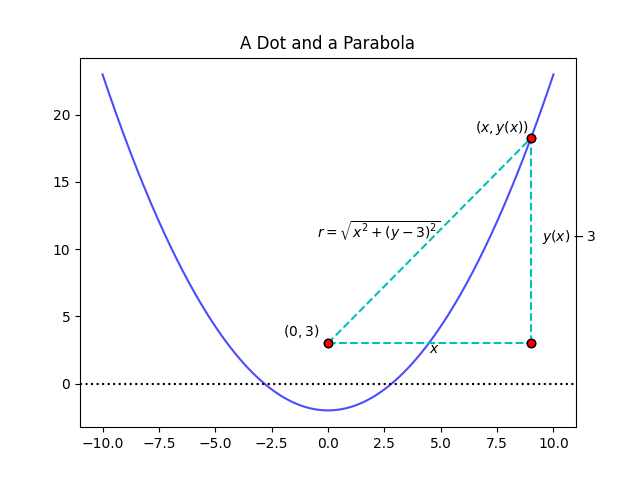

In [2]:
def parabola(x):
    return (1/4)*x*x -2

x = np.linspace(-10, 10, 10000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
xmid = (x1+x0)/2
ymid = (y1+y0)/2
        
fig, ax = plt.subplots()

ax.plot(x, parabola(x), color='b', alpha=0.7)
ax.plot([x0, x1], [y0, y1], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")
ax.plot([x0, x1], [y0, y0], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")
ax.plot([x1, x1], [y0, y1], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")


#ax.grid()
ax.text(xmid-5, ymid+0.2, '$r = \\sqrt{x^2+(y-3)^2}$')
ax.text(xmid, y0-0.7, '$x$')
ax.text(x1+0.5, ymid, '$y(x)-3$')
ax.text(x0-2, y0+0.5, '$(0, 3)$')
ax.text(x1-2.5, y1+0.5, '$(x, y(x))$')
ax.axhline(0, ls=':', color='k')
ax.set_title("A Dot and a Parabola")
plt.show()

From the graph above, it follows that $r^2 = x^2 + (y-3)^2$. If we differentiate with respect to $x$, we can determine how the rate of change of the distance $r$ is related to the rate of change of the function $y(x) = \frac{1}{4}x^2 -2$: 

\begin{align*}
2rr'(x) &= 2x + 2(y-3)y'(x)\\
\implies r'(x) &= \frac{x + (y-3)y'(x)}{r} \\
&= \frac{x + (y-3)y'(x)}{\sqrt{x^2 + (y-3)^2}}
\end{align*}

But recall that $y = \frac{1}{4}x^2-2$, so that $y'(x) = \frac{1}{2}x$ and $r = \sqrt{x^2 + (\frac{1}{4}x^2-5)^2} = \sqrt{\frac{1}{16}x^4+\frac{7}{2}x^2+25}$, so that this derivative is a function of $x$:

\begin{align*}
r'(x) &= \frac{x + (\frac{1}{4}x^2-2-3)(\frac{1}{2}x)}{\sqrt{\frac{1}{16}x^4-\frac{3}{2}x^2+25}} \\
&= \frac{\frac{1}{8}x^3-\frac{3}{2}x}{\sqrt{\frac{1}{16}x^4-\frac{3}{2}x^2+25}}
\end{align*}


In the following plot, we will consider the graphs of both $r(x)$ and $r'(x)$.


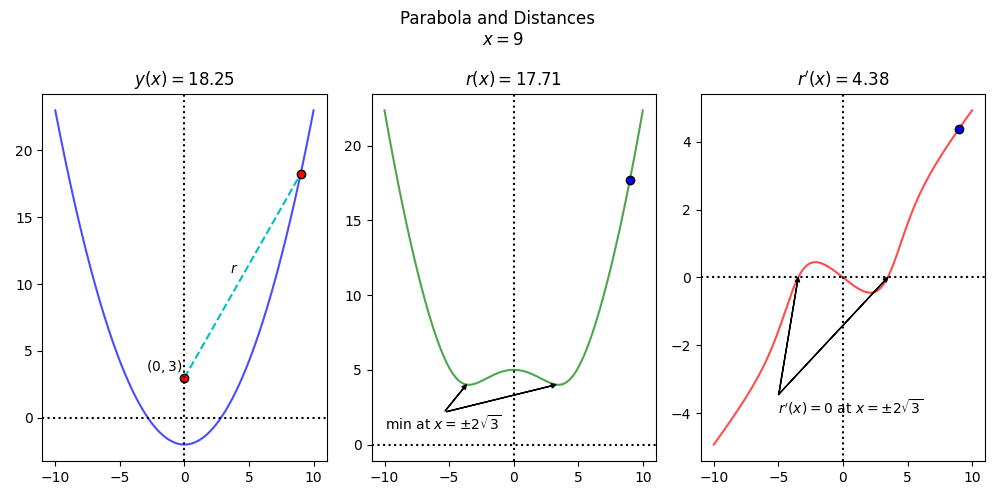

In [114]:
"""
The following graphs will be static for testing. 
Later on I will animate these graphs to have a visual 
representation of the rate of change. The annimation 
itself would be a related rate -- could comment on this 
during the lesson.

To maintain each cell selfconsistent, I will redefine
common parameters such as the x array, the parabola, 
midpoints, ect. 
"""
#define the functions for r and its derivative
def rOfX(x):
    return np.sqrt((1/16)*x**4 - (3/2)*x**2 + 25)

def rPrime(x):
    return ((1/8)*x**3 - (3/2)*x)/rOfX(x)

x = np.linspace(-10, 10, 1000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
x2 = -9
y2 = parabola(x2)
xmid1 = (x1+x0)/2
ymid1 = (y1+y0)/2
xmid2 = (x2+x0)/2
ymid2 = (y2+y0)/2

#below we find the cordinates for the extrema
xmin1 = -2*np.sqrt(3)
xmin2 = 2*np.sqrt(3)
rmin = rOfX(xmin1)
rp0 = 0
rp1 = rPrime(xmin1)
rp2 = rPrime(xmin2)

#plot the parabola
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].plot(x, parabola(x), color='b', alpha=0.7)
ax[0].plot([x0, x1], [y0, y1], color='c', 
        marker='o', markerfacecolor='red', 
        markeredgecolor='black', ls="--")

#plot the distance
ax[1].plot(x, rOfX(x), color='g', alpha=0.7)
ax[1].plot(x1, rOfX(x1), color='c', ls='',
           marker='o', #label='$x = {}$'.format(x1), 
           markerfacecolor='b',
           markeredgecolor='k')

#plot the derivative
ax[2].plot(x, rPrime(x), color='r', alpha=0.7)
ax[2].plot(x1, rPrime(x1), color='c', ls='',
           marker='o', #label='$x = {}$'.format(x1),
           markerfacecolor='b', 
           markeredgecolor='k')

#create titles that inform of x and y(x), r(x), r'(x)
ax[0].set_title('$y(x)= {}$'.format(np.round(parabola(x1), 2)))
ax[1].set_title('$r(x) = {}$'.format(np.round(rOfX(x1), 2)))
ax[2].set_title("$r'(x) = {}$".format(np.round(rPrime(x1), 2)))

#create coordinate axes
for a in ax:
    a.axhline(0, ls=':', color='k')
    a.axvline(0, ls=":", color='k')
    #a.legend()

#annotations and text
ax[0].text(x0-3, y0+0.5, '$(0, 3)$')
ax[0].text(xmid-1, ymid+0.2, '$r$')
ax[1].annotate(
    'min at $x=\\pm 2\\sqrt{3}$', 
    xy=(xmin1-.2, rmin), 
    xytext=(-10, 1),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[1].annotate(
    '', 
    xy=(xmin2-.2, rmin), 
    xytext=(-5.2, 2.2),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    "$r'(x)= 0$ at $x=\\pm 2\\sqrt{3}$", 
    xy=(xmin1, rp1), 
    xytext=(-5, -4),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[2].annotate(
    '', 
    xy=(xmin2, rp2), 
    xytext=(-5, -3.45),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)


fig.suptitle('Parabola and Distances \n $x={}$'.format(x1))
fig.tight_layout()
plt.show()

MovieWriter Pillow unavailable; using Pillow instead.


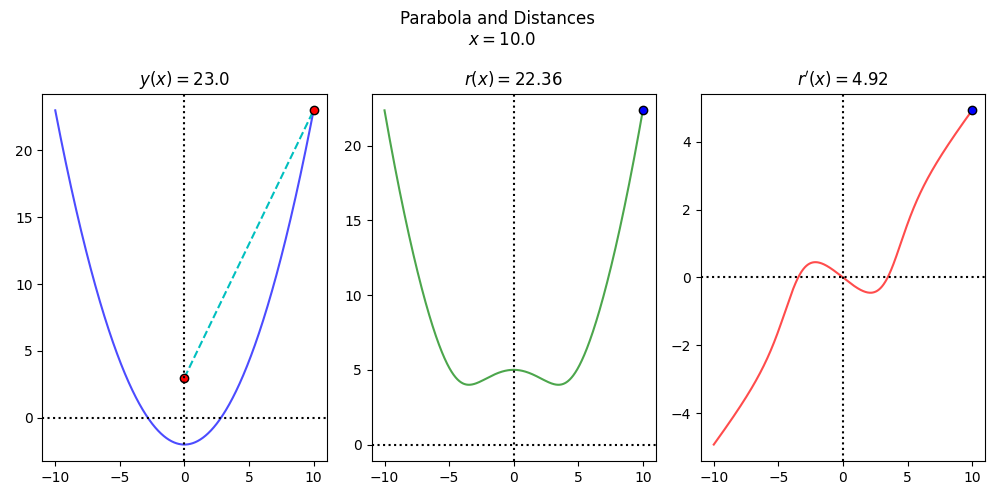

In [130]:
"""
In this cell I will create an animation of the plots 
above as we vary the x coordinate from which we're 
measuring distance. I will again redefine variables
for selfconsistency.
"""

x = np.linspace(-10, 10, 1000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
x2 = -9
y2 = parabola(x2)
xmid1 = (x1+x0)/2
ymid1 = (y1+y0)/2
xmid2 = (x2+x0)/2
ymid2 = (y2+y0)/2

#below we find the coordinates for the extrema
xmin1 = -2*np.sqrt(3)
xmin2 = 2*np.sqrt(3)
rmin = rOfX(xmin1)
rp0 = 0
rp1 = rPrime(xmin1)
rp2 = rPrime(xmin2)

"""
Now we need to consider the number of frames needed 
for the animation. If we aim for a 30fps frame-rate in the 
interval (-10,10), this turns out to be around 120 frames 
or x values. This would give us 5 seconds of animation.
"""

#define the x for the animation
xAni = np.linspace(-10, 10, 120) #the step is given by the interval divided by 120

#evaluate the functions for each xAni
yAni = parabola(xAni)
rAni = rOfX(xAni)
rPAni = rPrime(xAni)


fig, ax = plt.subplots(1, 3, figsize=(10,5))

#plot all the static functions as above, what will be updated are 
#just the moving coordinates
ax[0].plot(x, parabola(x), color='b', alpha=0.7)


#plot the distance
ax[1].plot(x, rOfX(x), color='g', alpha=0.7)

#plot the derivative
ax[2].plot(x, rPrime(x), color='r', alpha=0.7)

#empty arrays to update coordinate positions
coor0, = ax[0].plot([], [], color='c',
                    marker='o', markerfacecolor='r',
                    markeredgecolor='k', ls='--')
coor1, = ax[1].plot([], [], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')
coor2, = ax[2].plot([], [], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')

#template for printing the coordinate values on plot
title0 = fig.suptitle("")
title1 = ax[0].set_title("")
title2 = ax[1].set_title("")
title3 = ax[2].set_title("")

for a in ax:
    a.axhline(0, ls=':', color='k')
    a.axvline(0, ls=":", color='k')

def update(i):

    thisx0 = [x0, xAni[i]]
    thisy = [y0, yAni[i]]
    thisx = [xAni[i]]
    thisr = [rAni[i]]
    thisrp = [rPAni[i]]

    coor0.set_data(thisx0, thisy)
    coor1.set_data(thisx, thisr)
    coor2.set_data(thisx, thisrp)

    title0.set_text('Parabola and Distances \n $x={}$'.format(np.round(xAni[i],2)))
    title1.set_text('$y(x)= {}$'.format(np.round(yAni[i], 2)))
    title2.set_text('$r(x) = {}$'.format(np.round(rAni[i], 2)))
    title3.set_text("$r'(x) = {}$".format(np.round(rPAni[i], 2)))

    fig.tight_layout()


    ret = coor0, coor1, coor2, title0, title1, title2, title3
    return ret

ani = animation.FuncAnimation(
    fig, update, len(xAni), interval=167, blit=True
)
ani.save('parabola-distance.gif', writer='Pillow', fps=30)